# Importación de librerias de trabajo

# Programa o Script realizado por :
# Rolando Ortiz Herbas

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

# Lectura del dataset Limpio

In [3]:
ruta = "C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_Limpio.csv"
datasetT = pd.read_csv(ruta)

In [4]:
datasetT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ocupacion           2000 non-null   object 
 1   NoPago              2000 non-null   int64  
 2   TotalMonto          2000 non-null   int64  
 3   EstadoContrato      2000 non-null   object 
 4   Producto            2000 non-null   object 
 5   FechaInicioC        2000 non-null   object 
 6   FechaAdjudicación   2000 non-null   object 
 7   FechaUltimoPago     2000 non-null   object 
 8   FechaProyectadaFin  2000 non-null   object 
 9   MontoVencido        2000 non-null   int64  
 10  Mensualidad         2000 non-null   int64  
 11  Ingresos            2000 non-null   int64  
 12  Legal               2000 non-null   object 
 13  EdadActual          2000 non-null   int64  
 14  AZULEstatus         2000 non-null   object 
 15  AdjudicaReal        2000 non-null   object 
 16  PagosP

# Ver la informacion leida del dataset

In [5]:
datasetT.head()


,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,ejecutivo (a),35,302783,subastado con 013,autos,2015-04-17,2015-04-17,2018-02-21,2020-04-17,5046,...,mujer,fisica,"subasta (0,20]",evento,0.0,9,1,1,36,1
1,coordinador (a),38,211366,subastado con 012,autos,2015-02-20,2015-02-20,2018-02-08,2020-02-20,7044,...,hombre,fisica,"subasta (0,20]",modulo-agencia,0.0,9,1,1,40,1
2,arquitecto (a),50,323640,sorteo,autos,2015-02-20,2016-01-15,2019-02-18,2020-02-20,0,...,mujer,fisica,sorteo,modulo-agencia,47.0,8,1,1,50,1
3,gestor (a),60,377036,sorteo,autos,2015-04-17,2015-07-17,2020-03-05,2020-04-17,12566,...,mujer,fisica,sorteo,modulo-agencia,13.0,9,0,1,61,1
4,propietario (a),45,392349,subastado con 013,autos,2015-04-17,2015-04-17,2018-12-26,2020-04-17,6539,...,hombre,moral,"subasta (0,20]",modulo-agencia,0.0,9,0,1,46,1


# Ver estadística básica

In [6]:
datasetT.describe()

,NoPago,TotalMonto,MontoVencido,Mensualidad,Ingresos,EdadActual,PagosPuntuales,CostoAdmin,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.874000,281266.522000,10447.515500,4720.824500,23616.397000,38.624500,41.295000,19786.640500,41.630143,8.067000,0.168500,0.981000,45.569000,0.739500
std,13.788516,109728.153403,12004.923357,1771.529555,10306.101321,11.368954,14.954056,6841.694826,29.490978,1.024713,0.374403,0.136559,13.378742,0.439017
min,3.000000,12705.000000,0.000000,2000.000000,1440.000000,18.000000,0.000000,1571.000000,0.000000,1.000000,0.000000,0.000000,8.000000,0.000000
25%,34.000000,209467.000000,2421.000000,3491.000000,16358.750000,30.000000,30.000000,14772.500000,29.750000,8.000000,0.000000,1.000000,36.000000,0.000000
50%,47.000000,282068.500000,6783.500000,4701.000000,22905.500000,37.000000,44.500000,20630.000000,43.000000,8.000000,0.000000,1.000000,48.000000,1.000000
75%,56.000000,343684.750000,13512.000000,5727.500000,29489.250000,47.000000,54.000000,24845.250000,52.000000,9.000000,0.000000,1.000000,57.000000,1.000000
max,60.000000,842910.000000,94088.000000,14048.000000,72330.000000,82.000000,60.000000,39228.000000,296.000000,9.000000,1.000000,1.000000,68.000000,1.000000


 # Realizar la transformacion de datos

In [7]:
columnas_categoricas = ['Ocupacion', 'EstadoContrato', 'Producto', 'Legal', 'AZULEstatus',
           'AdjudicaReal', 'Genero', 'PersonaTipo', 'dtEstadoContrato', 'GrupoOrigenVenta']
columnas_numericas = ['NoPago', 'TotalMonto', 'MontoVencido', 'Mensualidad', 'Ingresos',
           'EdadActual', 'CostoAdmin', 'SemanasAdjud', 'Pagos9', 'Domicilia_Pago',
            'Email', 'timetotV']

In [8]:
# aqui realiza la transformación

#datasetT.insert(1, 'NFIC', 0)
#print(df)
datasetT['NFIC']=0
datasetT['NFADJ']=0
datasetT['NFUPAG']=0
datasetT['NFPROYFIN']=0

In [9]:
datasetT.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y,NFIC,NFADJ,NFUPAG,NFPROYFIN
0,ejecutivo (a),35,302783,subastado con 013,autos,2015-04-17,2015-04-17,2018-02-21,2020-04-17,5046,...,0.0,9,1,1,36,1,0,0,0,0
1,coordinador (a),38,211366,subastado con 012,autos,2015-02-20,2015-02-20,2018-02-08,2020-02-20,7044,...,0.0,9,1,1,40,1,0,0,0,0
2,arquitecto (a),50,323640,sorteo,autos,2015-02-20,2016-01-15,2019-02-18,2020-02-20,0,...,47.0,8,1,1,50,1,0,0,0,0
3,gestor (a),60,377036,sorteo,autos,2015-04-17,2015-07-17,2020-03-05,2020-04-17,12566,...,13.0,9,0,1,61,1,0,0,0,0
4,propietario (a),45,392349,subastado con 013,autos,2015-04-17,2015-04-17,2018-12-26,2020-04-17,6539,...,0.0,9,0,1,46,1,0,0,0,0


In [10]:

# Transforma FechaProyectadaFin (texto) a NFIC (entero)
for i in range(len(datasetT)):
    sfecha = str(datasetT.iloc[i,8])
    año= int(sfecha[:4])
    mes = int(sfecha[5:7])
    dia = int(sfecha[8:10])
    Ufecha = año*10000 + mes * 100 + dia
    datasetT.iloc[i, -1] = Ufecha  # Modificar el valor de la última columna
    #print(sfecha , datasetT.iloc[i, -1])
# Transforma FechaInicioC (texto) a NFIC (entero)
datasetT['FechaProyectadaFin']= 0
datasetT['FechaProyectadaFin'] = datasetT['NFPROYFIN']

    



In [11]:
# Transforma FechaUltimoPago (texto) a NFUPAG (entero)
for i in range(len(datasetT)):
    sfecha = str(datasetT.iloc[i,7])
    año= int(sfecha[:4])
    mes = int(sfecha[5:7])
    dia = int(sfecha[8:10])
    Ufecha = año*10000 + mes * 100 + dia
    datasetT.iloc[i, 30] = Ufecha  # Modificar el valor de la última colum
    #print(sfecha , datasetT.iloc[i, 30])
# Transforma FechaInicioC (texto) a NFIC (entero)
datasetT['FechaUltimoPago']= 0
datasetT['FechaUltimoPago'] = datasetT['NFUPAG']

In [12]:
# Transforma FechaAdjudicación (texto) a NFADJ (entero)
for i in range(len(datasetT)):
    sfecha = str(datasetT.iloc[i,6])
    año= int(sfecha[:4])
    mes = int(sfecha[5:7])
    dia = int(sfecha[8:10])
    Ufecha = año*10000 + mes * 100 + dia
    datasetT.iloc[i, 29] = Ufecha  # Modificar el valor de la última colum
    #print(sfecha , datasetT.iloc[i, 29])
# Transforma FechaInicioC (texto) a NFIC (entero)
datasetT['FechaAdjudicación']= 0
datasetT['FechaAdjudicación'] = datasetT['NFADJ']

In [13]:
# Transforma FechaInicioC (texto) a NFIC (entero)
for i in range(len(datasetT)):
    sfecha = str(datasetT.iloc[i,5])
    año= int(sfecha[:4])
    mes = int(sfecha[5:7])
    dia = int(sfecha[8:10])
    Ufecha = año*10000 + mes * 100 + dia
    datasetT.iloc[i, 28] = Ufecha  # Modificar el valor de la última colum
    #print(sfecha , datasetT.iloc[i, 28])
# Transforma FechaInicioC (texto) a NFIC (entero)
datasetT['FechaInicioC']= 0
datasetT['FechaInicioC'] = datasetT['NFIC']

In [14]:
datasetT.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y,NFIC,NFADJ,NFUPAG,NFPROYFIN
0,ejecutivo (a),35,302783,subastado con 013,autos,20150417,20150417,20180221,20200417,5046,...,0.0,9,1,1,36,1,20150417,20150417,20180221,20200417
1,coordinador (a),38,211366,subastado con 012,autos,20150220,20150220,20180208,20200220,7044,...,0.0,9,1,1,40,1,20150220,20150220,20180208,20200220
2,arquitecto (a),50,323640,sorteo,autos,20150220,20160115,20190218,20200220,0,...,47.0,8,1,1,50,1,20150220,20160115,20190218,20200220
3,gestor (a),60,377036,sorteo,autos,20150417,20150717,20200305,20200417,12566,...,13.0,9,0,1,61,1,20150417,20150717,20200305,20200417
4,propietario (a),45,392349,subastado con 013,autos,20150417,20150417,20181226,20200417,6539,...,0.0,9,0,1,46,1,20150417,20150417,20181226,20200417


In [15]:
# Borrar columnas auxiliares para la transformacion de fechas 

datasetT = datasetT.drop('NFIC', axis=1)
datasetT = datasetT.drop('NFADJ', axis=1)
datasetT = datasetT.drop('NFUPAG', axis=1)
datasetT = datasetT.drop('NFPROYFIN', axis=1)

In [16]:
datasetT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ocupacion           2000 non-null   object 
 1   NoPago              2000 non-null   int64  
 2   TotalMonto          2000 non-null   int64  
 3   EstadoContrato      2000 non-null   object 
 4   Producto            2000 non-null   object 
 5   FechaInicioC        2000 non-null   int64  
 6   FechaAdjudicación   2000 non-null   int64  
 7   FechaUltimoPago     2000 non-null   int64  
 8   FechaProyectadaFin  2000 non-null   int64  
 9   MontoVencido        2000 non-null   int64  
 10  Mensualidad         2000 non-null   int64  
 11  Ingresos            2000 non-null   int64  
 12  Legal               2000 non-null   object 
 13  EdadActual          2000 non-null   int64  
 14  AZULEstatus         2000 non-null   object 
 15  AdjudicaReal        2000 non-null   object 
 16  PagosP

# Transformar las otras variables categoricas

In [17]:
columnas_categoricas = ['Ocupacion', 'EstadoContrato', 'Producto', 'Legal', 'AZULEstatus',
           'AdjudicaReal', 'Genero', 'PersonaTipo', 'dtEstadoContrato', 'GrupoOrigenVenta']
columnas_numericas = ['NoPago', 'TotalMonto','FechaInicioC','FechaAdjudicación','FechaUltimoPago','FechaProyectadaFin','MontoVencido', 'Mensualidad', 'Ingresos',
           'EdadActual', 'CostoAdmin', 'SemanasAdjud', 'Pagos9', 'Domicilia_Pago',
            'Email', 'timetotV']

In [18]:
ordinale = OrdinalEncoder()
datasetT[columnas_categoricas] = ordinale.fit_transform(datasetT[columnas_categoricas])

In [19]:
datasetT.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,47.0,35,302783,6.0,0.0,20150417,20150417,20180221,20200417,5046,...,1.0,0.0,2.0,1.0,0.0,9,1,1,36,1
1,38.0,38,211366,5.0,0.0,20150220,20150220,20180208,20200220,7044,...,0.0,0.0,2.0,3.0,0.0,9,1,1,40,1
2,13.0,50,323640,1.0,0.0,20150220,20160115,20190218,20200220,0,...,1.0,0.0,1.0,3.0,47.0,8,1,1,50,1
3,59.0,60,377036,1.0,0.0,20150417,20150717,20200305,20200417,12566,...,1.0,0.0,1.0,3.0,13.0,9,0,1,61,1
4,97.0,45,392349,6.0,0.0,20150417,20150417,20181226,20200417,6539,...,0.0,1.0,2.0,3.0,0.0,9,0,1,46,1


In [17]:
datasetT.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_numeros.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [20]:
datasetT.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ocupacion           2000 non-null   float64
 1   NoPago              2000 non-null   int64  
 2   TotalMonto          2000 non-null   int64  
 3   EstadoContrato      2000 non-null   float64
 4   Producto            2000 non-null   float64
 5   FechaInicioC        2000 non-null   int64  
 6   FechaAdjudicación   2000 non-null   int64  
 7   FechaUltimoPago     2000 non-null   int64  
 8   FechaProyectadaFin  2000 non-null   int64  
 9   MontoVencido        2000 non-null   int64  
 10  Mensualidad         2000 non-null   int64  
 11  Ingresos            2000 non-null   int64  
 12  Legal               2000 non-null   float64
 13  EdadActual          2000 non-null   int64  
 14  AZULEstatus         2000 non-null   float64
 15  AdjudicaReal        2000 non-null   float64
 16  PagosP

In [21]:
scaler = StandardScaler()
# total_columnas = columnas_categoricas + columnas_numericas
total_columnas =  columnas_numericas
datasetT[total_columnas] = scaler.fit_transform(datasetT[total_columnas])

In [22]:
datasetT.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,47.0,-0.643740,0.196138,6.0,0.0,-1.516065,-1.977995,-2.146050,-1.516065,-0.450054,...,1.0,0.0,2.0,1.0,-1.411976,0.910727,2.221423,0.139169,-0.715418,1
1,38.0,-0.426113,-0.637193,5.0,0.0,-1.529225,-1.990703,-2.146967,-1.529225,-0.283581,...,0.0,0.0,2.0,3.0,-1.411976,0.910727,2.221423,0.139169,-0.416361,1
2,13.0,0.444394,0.386264,1.0,0.0,-1.529225,-1.352415,-1.440131,-1.529225,-0.870487,...,1.0,0.0,1.0,3.0,0.182130,-0.065401,2.221423,0.139169,0.331280,1
3,59.0,1.169816,0.873007,1.0,0.0,-1.516065,-1.958643,-0.727857,-1.516065,0.176512,...,1.0,0.0,1.0,3.0,-0.971053,0.910727,-0.450162,0.139169,1.153685,1
4,97.0,0.081683,1.012596,6.0,0.0,-1.516065,-1.977995,-2.075083,-1.516065,-0.325657,...,0.0,1.0,2.0,3.0,-1.411976,0.910727,-0.450162,0.139169,0.032223,1


# La transformacion inversa es :

In [ ]:

# datasetT[total_columnas] = scaler.inverse_transform(datasetT[total_columnas])

In [23]:
datasetT.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,47.0,-0.643740,0.196138,6.0,0.0,-1.516065,-1.977995,-2.146050,-1.516065,-0.450054,...,1.0,0.0,2.0,1.0,-1.411976,0.910727,2.221423,0.139169,-0.715418,1
1,38.0,-0.426113,-0.637193,5.0,0.0,-1.529225,-1.990703,-2.146967,-1.529225,-0.283581,...,0.0,0.0,2.0,3.0,-1.411976,0.910727,2.221423,0.139169,-0.416361,1
2,13.0,0.444394,0.386264,1.0,0.0,-1.529225,-1.352415,-1.440131,-1.529225,-0.870487,...,1.0,0.0,1.0,3.0,0.182130,-0.065401,2.221423,0.139169,0.331280,1
3,59.0,1.169816,0.873007,1.0,0.0,-1.516065,-1.958643,-0.727857,-1.516065,0.176512,...,1.0,0.0,1.0,3.0,-0.971053,0.910727,-0.450162,0.139169,1.153685,1
4,97.0,0.081683,1.012596,6.0,0.0,-1.516065,-1.977995,-2.075083,-1.516065,-0.325657,...,0.0,1.0,2.0,3.0,-1.411976,0.910727,-0.450162,0.139169,0.032223,1


# Grafica del dataset transformado

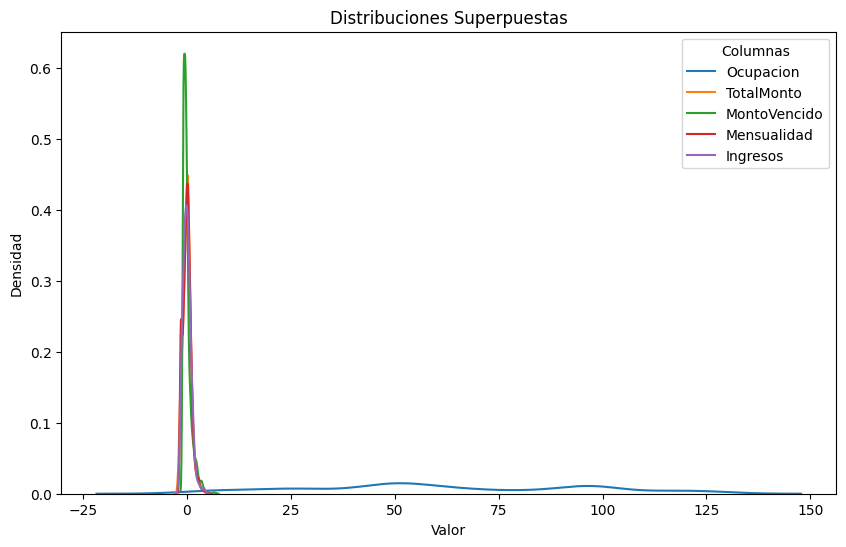

In [24]:
df = pd.DataFrame(datasetT)

# Graficar las distribuciones de cada columna en una sola gráfica

mis_columnas =  ['Ocupacion', 'TotalMonto','MontoVencido', 'Mensualidad', 'Ingresos']
plt.figure(figsize=(10, 6))
for column in mis_columnas:
    sns.kdeplot(df[column], label=column)

# Añadir títulos y etiquetas
plt.title('Distribuciones Superpuestas')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend(title='Columnas')
plt.show()

# Calcular correlaciones entre todas la variables

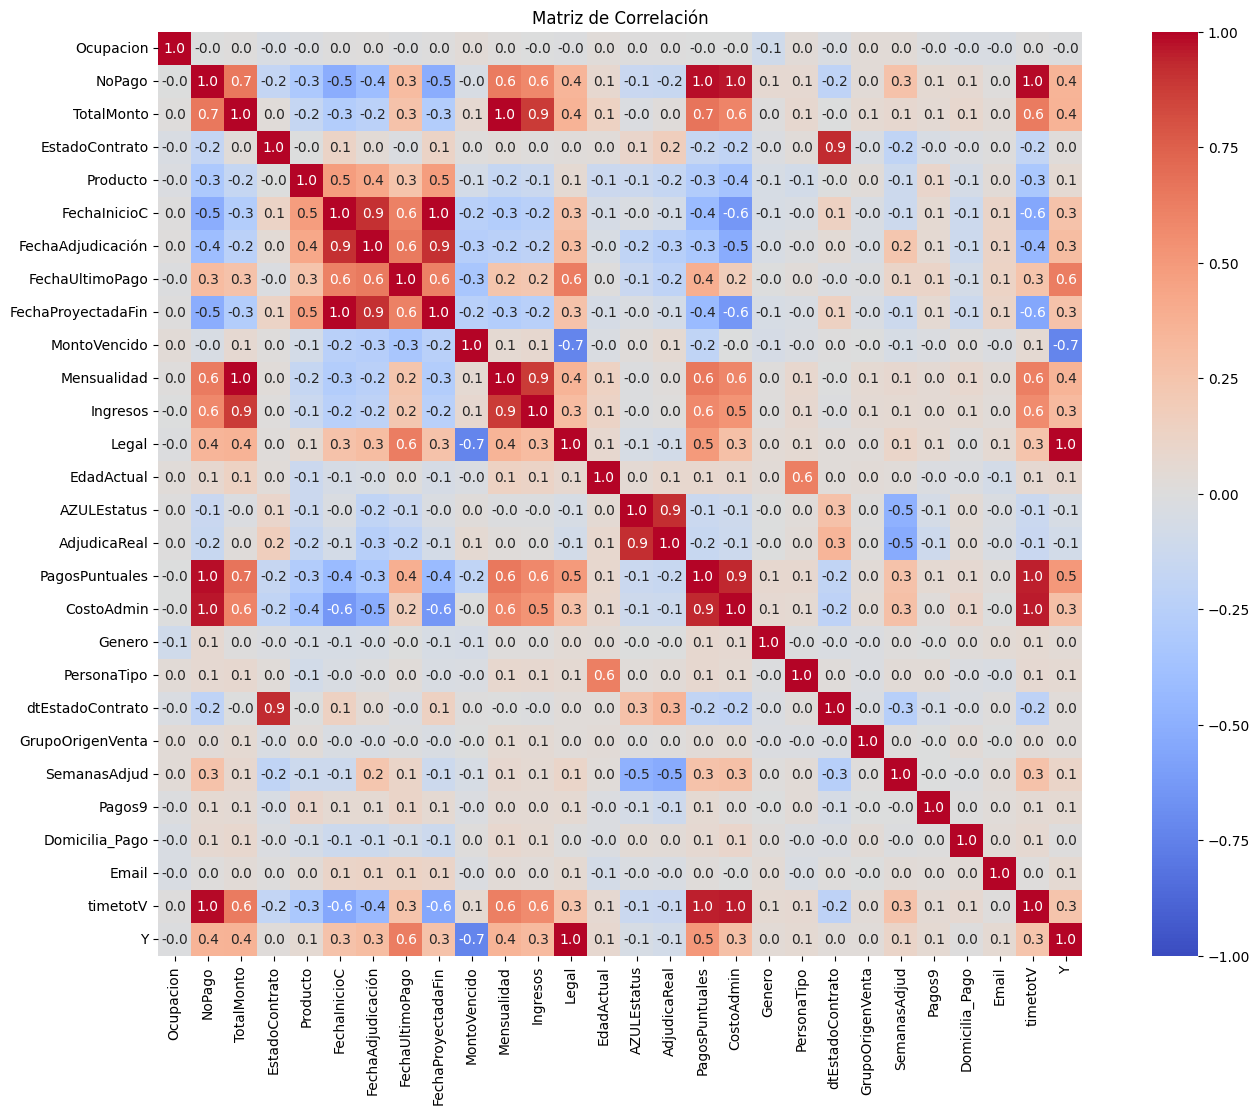

In [25]:
matriz_correlacion = datasetT.corr()

# Crear un mapa de calor con valores numéricos en cada cuadro
plt.figure(figsize=(18, 12))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(matriz_correlacion, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlación")
plt.show()

# Dividir en conjunto de entrenamiento y prueba

In [26]:
df = pd.DataFrame(datasetT)

# Tomar el 80% de los datos de manera aleatoria para entrenamiento
df_entrenamiento = df.sample(frac=0.8, random_state=1)

# Usar el 20% restante para pruebas
df_prueba = df.drop(df_entrenamiento.index)

# guarda el dataset de entrenamiento en : Clientes_Dos_Mil_TransEntrenamiento.csv

In [27]:
df_entrenamiento.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_TransEntrenamiento.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

# guarda el dataset de prueba en : Clientes_Dos_Mil_TransPrueba.csv

In [28]:
df_prueba.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_TransPrueba.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)